In [ ]:
# Training Models
# Source: "Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow" by Aurélien Géron
# Chapter 4: Classification, code with notes

TRAINING A LINEAR REGRESSION MODEL
- Direct "closed-form" equation: directly **computes** model parameters that best fit model to training set (model parameters that minimize the cost function over the training set)
- Gradient Descent (GD) {Iterative optimization approach}: gradually **tweaks** model parameters to minimize cost function over the training set, eventually converging to the same set of parameters as first method

LINEAR REGRESSION
- Find value of theta (parameter vector with bias parameter and feature weights) that minimizes the RMSE
- Minimize MSE (mean squared error)

NORMAL EQUATION
- equation in book

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Enable printing of multiple outputs per code block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1) # y = 4 + 3x_1 + Gaussian noise

In [8]:
# Using NumPy's linear algebra module (np.linalg) to compute inverse of matrix, dot() method for matrix multiplication
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # just the normal equation, page 114

In [9]:
# The function we used to generate data: y = 4 + 3x_1 + Gaussian noise
theta_best

array([[3.7436156 ],
       [3.25473481]])

Predicted value is 3.7436156 for theta_0 and 3.25473481 for theta_1 - the original parameters were 4 and 3, in order (noise makes it impossible to recover the original parameters directly).

In [10]:
# Make y predictions using theta hat (found above).
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.7436156 ],
       [10.25308523]])

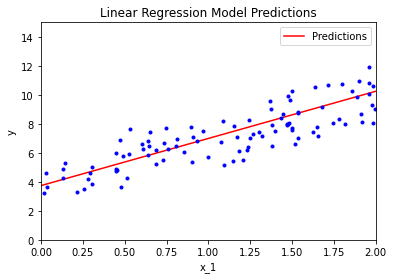

In [17]:
# Plot model's predictions
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="best")
plt.title("Linear Regression Model Predictions")
plt.xlabel("x_1")
plt.ylabel("y")
plt.show()

In [21]:
# Performing Linear Regression with Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

LinearRegression()

(array([4.08182097]), array([[2.95928756]]))

array([[ 4.08182097],
       [10.00039609]])

In [22]:
# LinearRegression class based on scipy.linalg.lstsq() function (least squares function)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[ 7.28297192],
       [-0.12350736]])

This function computes theta_hat = X+ y,  where X^+ is the pseudoinverse of X (Moore-Penrose inverse)
Can use np.linalg.pinv() to compute pseudoinverse directly

In [23]:
np.linalg.pinv(X_b).dot(y)

array([[ 7.28297192],
       [-0.12350736]])

Pseudoinverse is computed using standard matrix factorization technique (Singular Value Decomposition - SVD) that can decompose training set matrix X into matrix multiplication of three matrices (numpy.linalg.svd())
Pseudoinverse formula p.117

Whereas the Normal Equation may not work if the matrix is not invertible (singular), the pseudo

GRADIENT DESCENT

Gradient Descent
- generic optimization algorithm capable of finding optimal solutions to wide range of problems.
- tweak parameters iteratively in order to minimize cost function (MSE)
- measures the local gradient of the error function with regards to parameter vector theta + goes in direction of descending graident + once gradient = 0, have reached minimum

Methodology
- Random initialization: start by filling theta with random values 
- Improve it gradually, each step attempting to decrease the cost function
- IMPORTANT PARAMETER: LEARNING RATE - size of steps

MSE is a convex function
- Gradient Descent is guaranteed to approach the global minimum

Gradient Descent types
- Batch Gradient Descent
    - computes gradient at every step (on the full training set)
    - slow when training set is large
- Stochastic Gradient Descent
    - picks a *random* instance in the training set at every step
    - computes gradients based only on that single instance
- Mini-batch Gradient Descent
    - computes gradients on small random sets of instances called mini-batches

To implement Gradient Descent:
- compute the gradient of the cost function with regard to each model theta_j (partial derivative).
- Gradient vector of the cost function: partial derivatives of MSE with respect to each theta parameter, from theta_0 to theta_n.

In [24]:
# Implementation of Gradient Descent

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[ 7.28297192],
       [-0.12350736]])

This is the same result that the Normal Equation found.

In [25]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[ 7.32400444],
       [-0.11017664]])

In [27]:
# Perform Linear Regression using Stochastic GD with Scikit-Learn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

SGDRegressor(eta0=0.1, penalty=None)

(array([4.1112078]), array([3.03539588]))

Mini-batch Gradient descent
- less erratic thant with Stochastic GD, especially with fairly large mini-batches
- Mini-batch GD will go closer to the minimum that Stochastic GD
- Batch GD actually stops at the minimum, while BOTH Stochastic GD, Mini-batch GD continue to walk around
- Batch GD takes a lot of time to take each step => Stochastic GD, Mini-batch GD would also reach minimum if good learning schedule

LEARNING CURVES

If you perform high-degree Polynomial Regression, will fit training data much better than with plain Linear Regression. This high-degree Regression model will overfit the data.

How to tell if model is overfitting/underfitting data:
- Cross-validation
    - estimate of model's generalization performance
    - if model performs well on training data, but poorly on cross-validation metrics: overfitting data
- Learning curves
    - LEARNING CURVES: plots of model's performance on training set, validation set as function of training set size (training iteration)
    - Functions: performance on training set, validation set
    - Horizontal axis: Training set size
    - Vertical axis: RMSE

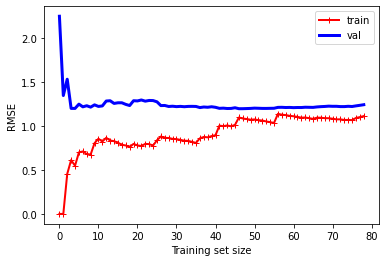

In [29]:
# Learning Curves of the Plain Linear Regression Model

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y , test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    # sqrt because plotting RMSE in vertical axis
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend(loc="best")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [30]:
# Learning Curves of the 10th Degree Polynomial Model

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

NameError: name 'PolynomialFeatures' is not defined

In [32]:
# Decision Boundaries with Iris dataset in Scikit-Learn

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [34]:
# Build classifier to detect Iris virigina type based only on the width feature
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

In [36]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0.5, 0, 'Petal width (cm)')

Text(0, 0.5, 'Probability')

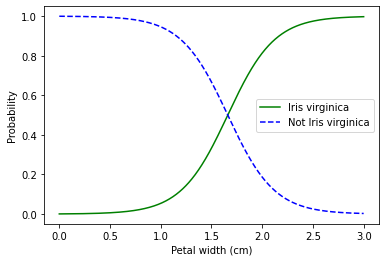

In [37]:
# Look at model's estimated probabilities for flowers with petal widths from 0cm to 3cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica") # 1 if Iris virginica
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica") # 0 if not Iris virginica
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="best")

In [38]:
# Softmax Regression (Multinomial Logistic Regression)
X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [39]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([2])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])